# Data Wrangling - Yellow Taxi
Data Collection, Data Organization, Data Definitions, and Data Cleaning. 

## Data Collection

In [1]:
import numpy as np
import pandas as pd
import time,datetime
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()
path='/Users/zora/Desktop/NYC TAXI/DATA WRANGLING/NYC TAXI DATA'
os.chdir(path)
direction = os.listdir()

### Load the data from the csv file
The data is from The official TLC trip record dataset.

In [3]:
df = pd.read_csv('yellow_tripdata_2019-09.csv', index_col=False)
df.head()

/Users/zora/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-09-01 00:06:48,2019-09-01 00:25:46,1.0,2.0,1.0,N,186,161,2.0,13.0,3.0,0.5,0.0,0.0,0.3,16.8,2.5
1,1.0,2019-09-01 00:29:17,2019-09-01 00:57:54,1.0,5.5,1.0,N,161,256,2.0,22.5,3.0,0.5,0.0,0.0,0.3,26.3,2.5
2,1.0,2019-09-01 00:41:32,2019-09-01 00:41:36,1.0,2.9,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-09-01 00:59:11,2019-09-01 00:59:15,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
4,1.0,2019-09-01 00:39:41,2019-09-01 00:45:06,1.0,1.5,1.0,N,95,93,2.0,7.0,0.5,0.5,0.0,0.0,0.3,8.3,0.0


## Data Definition
Review column names, data types, and null values.

### Column Names

In [4]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

Some of these column names are easy to understand but others are not as clear. There is a metadata file with information about each column to help understand what the column names refer to. 

Descriptions of Columns:

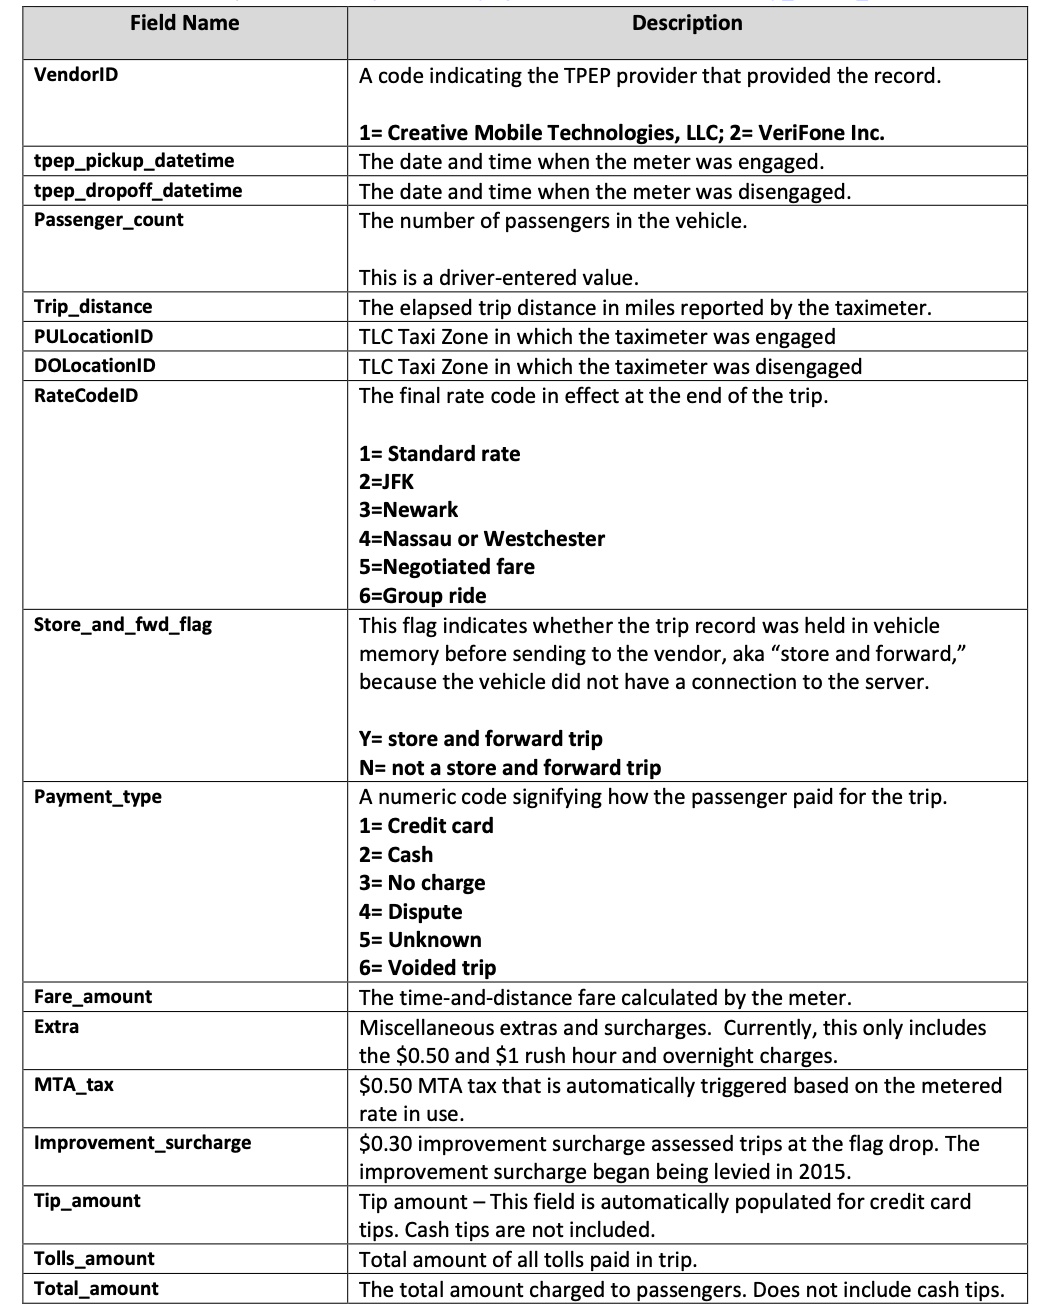

## Reading data and first exploration
First thing I like to do is exploring the data, investigating the number of features, their datatype, their meaning and statistics.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567788 entries, 0 to 6567787
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 901.9+ MB


### Data Types
Convert the columns to the appropriate types after reviewing the column description.

In [6]:
df = df.astype({'VendorID': object, 'passenger_count': object, 'PULocationID': object, 'DOLocationID': object, 
                'RatecodeID': object, 'payment_type': object}, errors='ignore')
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

### Null Values

In [7]:
df.isnull().sum().sort_values(ascending=False)

VendorID                 34089
payment_type             34089
passenger_count          34089
RatecodeID               34089
store_and_fwd_flag       34089
congestion_surcharge         1
extra                        0
fare_amount                  0
mta_tax                      0
total_amount                 0
PULocationID                 0
tip_amount                   0
tolls_amount                 0
trip_distance                0
improvement_surcharge        0
tpep_dropoff_datetime        0
tpep_pickup_datetime         0
DOLocationID                 0
dtype: int64

### Unique values

In [8]:
df.nunique()

VendorID                       3
tpep_pickup_datetime     2129612
tpep_dropoff_datetime    2130945
passenger_count               10
trip_distance               4583
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 261
DOLocationID                 263
payment_type                   4
fare_amount                 5184
extra                         45
mta_tax                       11
tip_amount                  3662
tolls_amount                1046
improvement_surcharge          5
total_amount               12548
congestion_surcharge           7
dtype: int64

### Range of values per column
Review the numeric dataset's summary statistics.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance,6567788.0,3.086974,4.036779,0.00,1.0,1.69,3.14,603.50
fare_amount,6567788.0,13.812060,60.529408,-530.00,6.5,9.50,15.50,150998.39
extra,6567788.0,1.150874,1.272248,-7.50,0.0,0.50,2.50,32.50
mta_tax,6567788.0,0.493713,0.065979,-0.50,0.5,0.50,0.50,15.55
tip_amount,6567788.0,2.277880,2.937932,-80.08,0.0,1.95,3.00,496.20
tolls_amount,6567788.0,0.408465,1.853549,-40.00,0.0,0.00,0.00,900.09
improvement_surcharge,6567788.0,0.298348,0.030410,-0.30,0.3,0.30,0.30,1.00
total_amount,6567788.0,19.918379,61.192518,-530.80,11.6,15.30,21.36,151007.81
congestion_surcharge,6567787.0,2.275256,0.730913,-2.50,2.5,2.50,2.50,2.75


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3e5f40110>,
      dtype=object)

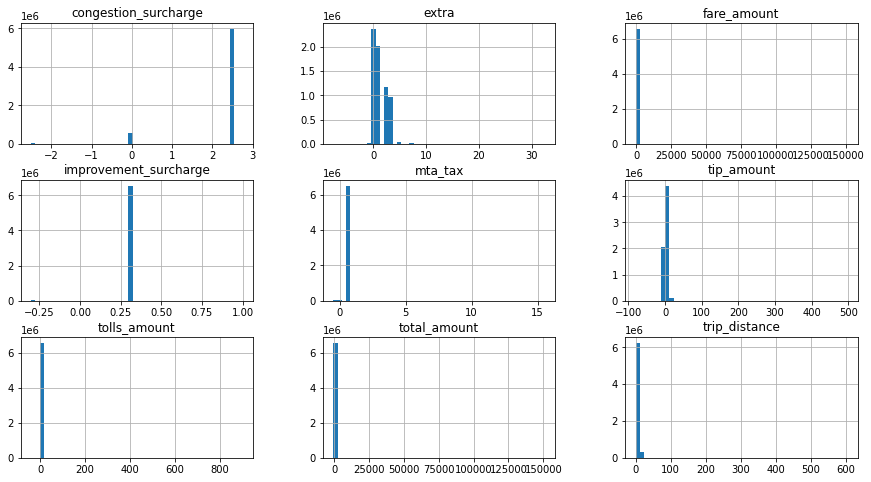

In [10]:
df.hist(figsize=(15,8), bins= 50)

## Data Cleaning

### Handle the missing and NA values
Check out the percent of each feature that is missing. 
*   Consider the columns individually 
*   Identify the appropriate fill method for each column 

In [11]:
na=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df)*100,columns = ['percent'])
pos = na['percent'] > 0
na[pos]

,percent
VendorID,0.519033
payment_type,0.519033
passenger_count,0.519033
RatecodeID,0.519033
store_and_fwd_flag,0.519033
congestion_surcharge,0.000015


Review each of these columns in the data.


*   Congestion surcharges are part of the total amount. Simply subtract the number of the congestion surcharges from the total to determine if any of the missing values can be backfilled or if they should be equal to zero. 


* fare_amount	
* extra	
* mta_tax	
* tip_amount	
* tolls_amount
* improvement_surcharge	
* congestion_surcharge		
* total_amount <- the sum of these columns for each row.

In [12]:
null_congestion_surcharge = df[df['congestion_surcharge'].isna()]
null_congestion_surcharge.reset_index(drop=True, inplace=True)
congestion_surcharge_fee = null_congestion_surcharge['total_amount'] - (null_congestion_surcharge[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']].sum(axis=0)).sum()
print('The missing congestion surcharge is : '+ str(congestion_surcharge_fee))

The missing congestion surcharge is : 0    0.0
Name: total_amount, dtype: float64


In [13]:
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0) #replace NA with zero.

That was simple, I can just fill 0 in to the missing value of the congestion surcharge.

Interesting discover all 34,089 rows contain missing values from the same columns, VendorID, payment_type, passenger_count, RatecodeID and store_and_fwd_flag.

* I could analyze the data sets of other months to see if there is any correlation.

In [14]:
null = df.isna()
print(null['total_amount'].sum() == (null[['fare_amount','extra', 'mta_tax', 'tip_amount', 'improvement_surcharge',
                                           'tolls_amount', 'congestion_surcharge']].sum(axis=0)).sum())

True


### Handle outliers
The following things I notice from the numeric dataset summary statistics:

* The minimal fare_amount is negative. As this does not seem to be realistic I will drop them from the dataset.
* Some of the minimum and maximum values in this summary are way too extreme, I will look into these to determine what happened and decide if I should remove them or keep some for further research.
* Unexpected values in columns,I will look into these to determine what happened and decide if I should remove them or keep some for further research as well.

In [15]:
print('Old size: %d' % len(df))
df = df[df.fare_amount >= 0]
print('New size: %d' % len(df))

Old size: 6567788
New size: 6552011


#### What is the maximum amount can you spend on a Taxi at a time?
After google for NYC taxi fare prices I find:
* Start range: 2.50 - 5.30 USD, 1 mile range: 2.50 - 6.00 USD, 1 hour Waiting range: 30.00 - 60.00 USD
  https://www.numbeo.com/taxi-fare/in/New-York
* A detailed description of the taxi prices: https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page
  * Initial charge (except airport trips) is 2.50 USD upon entry. Plus 50 cents per 1/5 mile when traveling above 12mph or per 60 seconds in slow traffic or when the vehicle is stopped. 
  * Plus 50 cents overnight surcharge 8pm to 6am.
     Plus 1 USD rush hour surcharge from 4pm to 8pm on weekdays, excluding holidays.
  * Plus 50 cents MTA State Surcharge for all trips that end in New York City or Nassau, Suffolk, Westchester, Rockland, Dutchess, Orange or Putnam Counties.
  * Plus 30 cents Improvement Surcharge.
  * Plus New York State Congestion Surcharge of 2.50 USD (Yellow Taxi) or 2.75 USD (Green Taxi and FHV) or 75 cents (any shared ride) for all trips that begin, end or pass through Manhattan south of 96th Street.
* Airport Trips:
  * Trips to and from LaGuardia Airport (LGA) are charged the standard metered fare.
  * Trips between Manhattan and John F. Kennedy Airport (JFK) in either direction (RateCodeID = 2):
     * 52 USD
     * Plus 50 cents MTA State Surcharge.
     * Plus 30 cents Improvement Surcharge.
     * 4.50 USD rush hour surcharge (4pm to 8pm weekdays, excluding legal holidays).
     * Plus New York State Congestion Surcharge of 2.50 USD (Yellow Taxi) or 2.75 USD (Green Taxi and FHV) or 75 cents (any shared ride) for all trips that begin, end or pass through Manhattan south of 96th Street.
     * Trips between John F. Kennedy Airport (JFK) and other New York City destinations are charged the standard metered fare.
  * Trips to Newark Airport (EWR)(RateCodeID = 3):
     * Standard metered fair.
     * Plus 17.50 USD Newark Surcharge.
     * Plus 30 cents Improvement Surcharge.
     * Plus tip and tolls to and from EWR (passengers are charged for the drivers’ return tolls).


Base on the above information plus the tolls, the most you can spend on the fare is about 1,000 USD.

Let's take a look at these values that exceed 1000 from the fare amount column.

In [16]:
fare_amount_extreme = df[df['fare_amount'] > 1000] # 4+ hrs & trip_distance=226.45 and total=1170.30 maybe? 
fare_amount_extreme

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
718394,1,2019-09-05 06:06:35,2019-09-05 06:06:35,2,0.00,1,Y,79,264,2,6007.50,2.5,0.5,0.0,0.00,0.3,6010.80,2.5
804065,2,2019-09-05 13:03:25,2019-09-05 17:18:05,2,226.45,4,N,48,265,2,1167.00,0.0,0.5,0.0,0.00,0.3,1170.30,2.5
820246,1,2019-09-05 15:32:15,2019-09-05 15:32:29,1,17.00,4,N,193,193,2,2759.07,0.0,0.0,0.0,0.00,0.3,2759.37,0.0
820247,1,2019-09-05 15:33:18,2019-09-05 15:33:35,1,17.00,4,N,193,193,2,2759.07,0.0,0.0,0.0,0.00,0.3,2759.37,0.0
820248,1,2019-09-05 15:34:19,2019-09-05 15:34:22,1,17.00,4,N,193,193,2,2759.07,0.0,0.0,0.0,0.00,0.3,2759.37,0.0
820249,1,2019-09-05 15:34:52,2019-09-05 15:34:52,1,0.00,4,Y,193,264,2,2759.07,0.0,0.0,0.0,0.00,0.3,2759.37,0.0
2677231,2,2019-09-13 17:12:41,2019-09-14 09:33:46,1,0.00,1,N,193,161,2,1928.50,1.0,0.5,0.0,0.00,0.3,1932.80,2.5
2831696,1,2019-09-14 09:32:25,2019-09-14 09:32:25,1,0.00,1,N,142,264,2,1867.50,2.5,0.5,0.0,0.00,0.3,1870.80,2.5
4412455,1,2019-09-21 01:33:59,2019-09-21 01:33:59,1,0.00,1,Y,79,264,2,2475.00,3.0,0.5,0.0,0.00,0.3,2478.80,2.5
4429275,1,2019-09-21 05:50:58,2019-09-21 05:50:58,1,0.00,1,Y,141,264,2,10524.00,3.0,0.5,0.0,0.00,0.3,10527.80,2.5


All trips seem to be impossible, I will remove them from the dataset.

In [17]:
df.drop(df[df.fare_amount > 1000].index, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance,6551998.0,3.090649,4.036599,0.0,1.00,1.69,3.15,603.50
fare_amount,6551998.0,13.846223,12.648598,0.0,6.50,10.00,15.50,999.50
extra,6551998.0,1.154489,1.271304,-7.5,0.00,0.50,2.50,32.50
mta_tax,6551998.0,0.496076,0.044983,0.0,0.50,0.50,0.50,15.55
tip_amount,6551998.0,2.283413,2.938661,0.0,0.00,1.96,3.00,496.20
tolls_amount,6551998.0,0.409840,1.854243,0.0,0.00,0.00,0.00,900.09
improvement_surcharge,6551998.0,0.299787,0.008009,0.0,0.30,0.30,0.30,1.00
total_amount,6551998.0,19.975020,15.471219,0.0,11.62,15.30,21.50,999.80
congestion_surcharge,6551998.0,2.285325,0.700425,0.0,2.50,2.50,2.50,2.75


Now take a look at the trip distance outlier. The [NYC citywide maximum speed limit is 25 mph](http://www.nyc.gov/html/visionzero/pages/dialogue/25mphcampaign.html) and the [NYS statewide maximum speed limit is 55 mph](http://ypdcrime.com/vt/article30.htm?zoom_highlight=fifty+five+miles+per+hour#t1180-a.) unless otherwise posted.

The maximum distance in this dataset is 603.5 miles, it takes more than 24 hours to travel 600 miles in the city or 11 hours on the highway. 600 miles can take you from New York City to Frankfort, KC or Columbia, SC .

Back to the speculation of the most people can spend on a Taxi fare is 1000 USD, the maximum distance should not exceed 300 miles.

In [18]:
trip_distance_extreme = df[df['trip_distance'] > 300]
trip_distance_extreme

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3229662,1,2019-09-16 07:40:26,2019-09-16 07:58:57,3,603.5,1,N,33,113,1,15.5,2.5,0.5,3.76,0.0,0.3,22.56,2.5


All the numbers add up well except the distance. I compare the pick-up time and location with the drop-off time and location, I found the 18-minutes drive is correct and the distance between two locations is about 3.5 miles without toll. 

This may just be a system error, I will fill it with 3.5 instead of deleting it.

In [19]:
df['trip_distance'].replace(to_replace=[603.5], value=3.5, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance,6551998.0,3.090558,4.029778,0.0,1.00,1.69,3.15,179.03
fare_amount,6551998.0,13.846223,12.648598,0.0,6.50,10.00,15.50,999.50
extra,6551998.0,1.154489,1.271304,-7.5,0.00,0.50,2.50,32.50
mta_tax,6551998.0,0.496076,0.044983,0.0,0.50,0.50,0.50,15.55
tip_amount,6551998.0,2.283413,2.938661,0.0,0.00,1.96,3.00,496.20
tolls_amount,6551998.0,0.409840,1.854243,0.0,0.00,0.00,0.00,900.09
improvement_surcharge,6551998.0,0.299787,0.008009,0.0,0.30,0.30,0.30,1.00
total_amount,6551998.0,19.975020,15.471219,0.0,11.62,15.30,21.50,999.80
congestion_surcharge,6551998.0,2.285325,0.700425,0.0,2.50,2.50,2.50,2.75


The minimum and maximum values in the extra column is still incorrect. I will check its unique values and the percentage of each unique value.
* Miscellaneous extras and surcharges. Currently, this only includes the 0.50 USD and 1 USD rush hour and overnight charges. To/From JFK 4.50 USD rush hour surcharge (4pm to 8pm weekdays, excluding legal holidays).

In [20]:
print('Unique codes for extra are: \n' + str(df['extra'].value_counts()))

Unique codes for extra are: 
 0.00     2366989
 0.50     1301359
 2.50     1138768
 1.00      712165
 3.00      600811
 3.50      362741
 2.75       30722
 4.50       25395
 7.00       10285
 5.50        1670
 0.80         465
 1.30         250
 8.25         144
 1.80         107
 2.00          58
 0.30          21
 2.80          14
 9.50           5
 0.25           5
 2.05           3
 5.00           2
 2.95           2
 5.30           2
 27.60          2
 12.00          1
 15.00          1
-7.50           1
 0.70           1
 2.01           1
 13.10          1
 0.45           1
 4.00           1
 7.22           1
 20.60          1
-0.50           1
 3.45           1
 32.50          1
Name: extra, dtype: int64


In [21]:
extra_unique_vals = df['extra'].value_counts()
extra_vals = df['extra'].count()
percent = (extra_unique_vals/extra_vals) * 100
print(percent)

 0.00     36.126217
 0.50     19.862018
 2.50     17.380469
 1.00     10.869432
 3.00      9.169890
 3.50      5.536342
 2.75      0.468895
 4.50      0.387592
 7.00      0.156975
 5.50      0.025488
 0.80      0.007097
 1.30      0.003816
 8.25      0.002198
 1.80      0.001633
 2.00      0.000885
 0.30      0.000321
 2.80      0.000214
 9.50      0.000076
 0.25      0.000076
 2.05      0.000046
 5.00      0.000031
 2.95      0.000031
 5.30      0.000031
 27.60     0.000031
 12.00     0.000015
 15.00     0.000015
-7.50      0.000015
 0.70      0.000015
 2.01      0.000015
 13.10     0.000015
 0.45      0.000015
 4.00      0.000015
 7.22      0.000015
 20.60     0.000015
-0.50      0.000015
 3.45      0.000015
 32.50     0.000015
Name: extra, dtype: float64


In [22]:
df.drop(df[(df.extra != 0) & (df.extra != 0.5) & (df.extra != 1) & (df.extra != 2.5) & (df.extra != 3) 
           & (df.extra != 3.5) & (df.extra != 4.50)].index, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance,6508228.0,3.032591,3.948725,0.0,1.0,1.67,3.10,179.03
fare_amount,6508228.0,13.677059,12.470699,0.0,6.5,9.50,15.50,999.50
extra,6508228.0,1.136418,1.246664,0.0,0.0,0.50,2.50,4.50
mta_tax,6508228.0,0.496729,0.041029,0.0,0.5,0.50,0.50,15.55
tip_amount,6508228.0,2.286011,2.923904,0.0,0.0,1.96,3.00,496.20
tolls_amount,6508228.0,0.393771,1.796958,0.0,0.0,0.00,0.00,806.13
improvement_surcharge,6508228.0,0.299825,0.007261,0.0,0.3,0.30,0.30,1.00
total_amount,6508228.0,19.784716,15.265440,0.0,11.6,15.00,21.35,999.80
congestion_surcharge,6508228.0,2.296532,0.683568,0.0,2.5,2.50,2.50,2.75


Even though 2.5, 3 and 3.5 are not the right amount of miscellaneous extras and surcharges , however,  they are more than 5 percent in this column. I'll keep them for the further EDA.

The 30 cents Improvement Surcharge is the must for every ride. The MTA State Surcharg could be 0 or 50 cents. The Congestion Surcharge could be 0 or 2.5 USD.

In [23]:
print('Unique codes for Improvement Surcharge are: \n' + str(df['improvement_surcharge'].value_counts()))

Unique codes for Improvement Surcharge are: 
0.30    6504425
0.00       3790
0.03         10
1.00          3
Name: improvement_surcharge, dtype: int64


In [24]:
improvement_surcharge_1 = df[(df['improvement_surcharge'] == 1)]
improvement_surcharge_1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1024066,2,2019-09-06 12:24:56,2019-09-06 12:25:15,3,0.0,1,N,265,265,2,2.95,0.0,0.0,0.0,0.0,1.0,3.95,0.0
1024067,2,2019-09-06 12:25:44,2019-09-06 12:26:49,2,0.0,1,N,265,265,2,2.95,0.0,0.0,0.0,0.0,1.0,3.95,0.0
1024068,2,2019-09-06 12:28:23,2019-09-06 12:29:00,2,0.0,1,N,265,265,2,2.95,0.0,0.0,0.0,0.0,1.0,3.95,0.0


In [25]:
improvement_surcharge_3cent = df[(df['improvement_surcharge'] == 0.03)]
improvement_surcharge_3cent.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2885413,2,2019-09-14 14:40:58,2019-09-14 15:24:50,2,16.70,1,N,132,256,2,48.0,0.0,0.05,0.00,0.00,0.03,48.08,0.0
2909814,2,2019-09-14 16:34:12,2019-09-14 17:24:59,2,18.81,2,N,132,249,1,52.0,0.0,0.05,12.36,6.12,0.03,73.06,2.5
2949402,2,2019-09-14 19:13:24,2019-09-14 19:27:24,2,1.49,1,N,224,90,1,10.0,0.0,0.05,1.89,0.00,0.03,14.47,2.5
3598795,2,2019-09-17 19:06:56,2019-09-17 19:21:55,2,1.83,1,N,161,263,1,10.5,1.0,0.05,3.80,0.00,0.03,17.88,2.5
3598796,2,2019-09-17 19:40:39,2019-09-17 19:49:10,1,1.46,1,N,141,233,2,7.5,1.0,0.05,0.00,0.00,0.03,11.08,2.5


In [26]:
improvement_surcharge_0 = df[(df['improvement_surcharge'] == 0)]
improvement_surcharge_0.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
644,1,2019-09-01 00:02:02,2019-09-01 00:02:02,1,0.0,1,N,137,264,2,27.0,0.0,0.0,0.0,0.00,0.0,27.00,0.0
1028,1,2019-09-01 00:01:26,2019-09-01 00:01:26,1,0.0,1,N,201,264,2,31.0,0.0,0.0,0.0,2.29,0.0,33.29,0.0
2071,1,2019-09-01 00:16:01,2019-09-01 00:16:01,0,0.0,5,Y,249,264,2,35.0,0.0,0.0,0.0,10.50,0.0,45.50,0.0
4845,2,2019-09-01 00:14:10,2019-09-01 01:08:30,1,40.7,5,N,186,265,2,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
6184,2,2019-09-01 22:00:20,2019-09-02 00:02:27,5,0.0,5,N,138,170,1,60.0,0.0,0.0,8.5,0.00,0.0,71.00,2.5


There are three unexpected values 0, 0.03 and 1. In this particular case I will keep 0.03 and delete other values. The value of 0.03 is an obvious system issue it happens on the MTA column the same time, I will fill in the correct number if necessary in the future research.

In [27]:
df = df[(df['improvement_surcharge'] == 0.3)|(df['improvement_surcharge'] == 0.03)]

In [28]:
print('Unique codes for MTA tax are: \n' + str(df['mta_tax'].value_counts()))

Unique codes for MTA tax are: 
0.50    6465166
0.00      39259
0.05         10
Name: mta_tax, dtype: int64


There are five unexpected values 0.05, 0.70, 2.78, 3.30 and 15.55. The value of 0.05 is an obvious system issue it happens on the Improvement Surcharge column the same time, I will keep it and delete others.

In [29]:
df = df[(df['mta_tax'] == 0) | (df['mta_tax'] == 0.5) | (df['mta_tax'] == 0.05)]

Last, take a look at the Congestion Surcharge and delete unexpeted values. Then done with float values.

In [30]:
print('Unique codes for Congestion Surcharge are: \n' + str(df['congestion_surcharge'].value_counts()))

Unique codes for Congestion Surcharge are: 
2.50    5978169
0.00     526070
2.75        110
0.75         86
Name: congestion_surcharge, dtype: int64


In [31]:
df = df[(df['congestion_surcharge'] == 0) | (df['congestion_surcharge'] == 2.5)]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance,6504239.0,3.033981,3.948838,0.00,1.0,1.68,3.10,179.03
fare_amount,6504239.0,13.670813,12.444089,0.00,6.5,9.50,15.50,999.50
extra,6504239.0,1.137090,1.246734,0.00,0.0,0.50,2.50,4.50
mta_tax,6504239.0,0.496981,0.038732,0.00,0.5,0.50,0.50,0.50
tip_amount,6504239.0,2.286015,2.921666,0.00,0.0,1.96,3.00,496.20
tolls_amount,6504239.0,0.393871,1.797143,0.00,0.0,0.00,0.00,806.13
improvement_surcharge,6504239.0,0.300000,0.000335,0.03,0.3,0.30,0.30,0.30
total_amount,6504239.0,19.780451,15.241156,0.30,11.6,15.00,21.35,999.80
congestion_surcharge,6504239.0,2.297797,0.681631,0.00,2.5,2.50,2.50,2.50


VendorID
* A code indicating the TPEP provider that provided the record.
  1= Creative Mobile Technologies, LLC; 
  2= VeriFone Inc.

In [32]:
print('Unique codes for Vendor ID are: \n' + str(df['VendorID'].value_counts()))

Unique codes for Vendor ID are: 
2.0    4220062
1.0    2282616
4.0         26
Name: VendorID, dtype: int64


In [33]:
VendorID_4 = df[df['VendorID'].astype(str).str.contains('4')] #Might be a testing ID
VendorID_4.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
204814,4,2019-09-02 13:58:39,2019-09-02 14:35:37,1,18.28,1,N,132,17,2,50.5,0.0,0.5,0.00,0.00,0.3,51.30,0.0
346077,4,2019-09-03 11:48:36,2019-09-03 12:19:12,1,7.56,1,N,138,140,2,27.5,0.0,0.5,0.00,6.12,0.3,36.92,2.5
356594,4,2019-09-03 12:21:38,2019-09-03 12:29:34,1,1.09,1,N,140,263,1,7.0,0.0,0.5,3.09,0.00,0.3,13.39,2.5
356595,4,2019-09-03 12:31:17,2019-09-03 12:56:03,1,2.25,1,N,263,161,2,15.5,0.0,0.5,0.00,0.00,0.3,18.80,2.5
452833,4,2019-09-03 20:25:42,2019-09-03 21:05:31,1,20.05,2,N,132,87,2,52.0,0.0,0.5,0.00,6.12,0.3,61.42,2.5


In [34]:
VendorID_4 = VendorID_4[(VendorID_4['fare_amount']>=0) & (VendorID_4['extra']>=0) & (VendorID_4['mta_tax']>=0) & 
                        (VendorID_4['tip_amount']>=0) & (VendorID_4['tolls_amount']>=0) & 
                        (VendorID_4['improvement_surcharge']>=0) & (VendorID_4['total_amount']>=0) & 
                        (VendorID_4['congestion_surcharge']>=0)]
print(VendorID_4['total_amount'].sum() == (VendorID_4[['fare_amount','extra','mta_tax','tip_amount',
                                                       'improvement_surcharge','tolls_amount',
                                                       'congestion_surcharge']].sum(axis=0)).sum())                                                                                                                                             

True


Passenger_count 
* Passenger count should not be zero, however, this is a driver-entered value and can easily cause typographical errors. After investigating the data, if it was just a case of incorrect input then fill in with the median.

In [35]:
print('Unique codes for Passengers are: \n' + str(df['passenger_count'].value_counts()))

Unique codes for Passengers are: 
1.0    4581477
2.0     999478
3.0     271491
5.0     253517
6.0     154124
4.0     122686
0.0     119854
7.0         29
9.0         25
8.0         23
Name: passenger_count, dtype: int64


In [36]:
passenger_unique_vals = df['passenger_count'].value_counts()
passenger_vals = df['passenger_count'].count()
passenger_percent = (passenger_unique_vals/passenger_vals) * 100
print(passenger_percent)

1.0    70.454952
2.0    15.370191
3.0     4.175048
5.0     3.898640
6.0     2.370152
4.0     1.886692
0.0     1.843141
7.0     0.000446
9.0     0.000384
8.0     0.000354
Name: passenger_count, dtype: float64


In [37]:
passenger0 = df[df['passenger_count'] == 0]
passenger0.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
12,1,2019-09-01 00:40:44,2019-09-01 00:56:58,0,4.4,1,N,239,107,1,16.0,3.0,0.5,3.95,0.0,0.3,23.75,2.5
79,1,2019-09-01 00:18:20,2019-09-01 00:22:36,0,1.3,1,N,97,49,1,6.0,0.5,0.5,1.45,0.0,0.3,8.75,0.0
80,1,2019-09-01 00:51:29,2019-09-01 01:01:15,0,1.6,1,N,79,144,1,8.5,3.0,0.5,1.50,0.0,0.3,13.80,2.5
132,1,2019-09-01 00:47:41,2019-09-01 00:52:11,0,0.3,1,N,68,158,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
133,1,2019-09-01 00:58:10,2019-09-01 01:20:21,0,5.0,1,N,158,237,1,18.5,3.0,0.5,3.00,0.0,0.3,25.30,2.5


In [38]:
print(passenger0['total_amount'].sum() == (passenger0[['fare_amount','extra','mta_tax','tip_amount',
                                                       'improvement_surcharge','tolls_amount',
                                                       'congestion_surcharge']].sum(axis=0)).sum())  

False


In [39]:
print(passenger0['total_amount'] == np.where(passenger0[['fare_amount','extra','mta_tax','tip_amount',
                                                       'improvement_surcharge','tolls_amount',
                                                       'congestion_surcharge']].sum(axis=0))) #???

12         False
79         False
80         False
132        False
133        False
           ...  
6533205    False
6533206    False
6533253    False
6533254    False
6533601    False
Name: total_amount, Length: 119854, dtype: bool


In [40]:
df['passenger_count'].replace(0, df['passenger_count'].median(), inplace=True)


Ratecode ID
The final rate code in effect at the end of the trip.
* 1= Standard rate
* 2=JFK
* 3=Newark
* 4=Nassau or Westchester 
* 5=Negotiated fare 
* 6=Group ride

In [41]:
print('Unique codes for Ratecode ID are: \n' + str(df['RatecodeID'].value_counts()))

Unique codes for Ratecode ID are: 
1.0     6267083
2.0      179969
5.0       33079
3.0       16888
4.0        5422
99.0        215
6.0          48
Name: RatecodeID, dtype: int64


In [42]:
RatecodeID_99 = df[df['RatecodeID'].astype(str).str.contains('99')] #Might be a testing ID
RatecodeID_99.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
78279,2,2019-09-01 15:24:58,2019-09-01 15:30:34,1.0,0.68,99,N,237,236,2,5.5,0.0,0.5,0.0,0.0,0.3,8.8,2.5
78822,2,2019-09-01 15:46:01,2019-09-01 15:52:25,1.0,1.10,99,N,43,163,2,6.5,0.0,0.5,0.0,0.0,0.3,9.8,2.5
80923,1,2019-09-01 15:20:12,2019-09-01 15:20:12,1.0,0.00,99,N,264,264,1,50.0,0.0,0.5,0.0,0.0,0.3,50.8,0.0
81865,2,2019-09-01 15:50:16,2019-09-01 16:00:11,2.0,2.53,99,N,186,144,2,9.5,0.0,0.5,0.0,0.0,0.3,12.8,2.5
105469,2,2019-09-01 18:14:10,2019-09-01 18:24:03,1.0,0.83,99,N,141,163,2,7.5,0.0,0.5,0.0,0.0,0.3,10.8,2.5


In [43]:
print(RatecodeID_99['total_amount'].sum() == (RatecodeID_99[['fare_amount','extra', 'mta_tax', 'tip_amount', 
                                                             'improvement_surcharge', 'tolls_amount', 
                                                             'congestion_surcharge']].sum(axis=0)).sum())

False


In [44]:
print(RatecodeID_99['total_amount'] == np.where(RatecodeID_99[['fare_amount','extra','mta_tax','tip_amount',
                                                       'improvement_surcharge','tolls_amount',
                                                       'congestion_surcharge']].sum(axis=0)))

78279      False
78822      False
80923      False
81865      False
105469     False
           ...  
6411970    False
6442280    False
6472428    False
6474558    False
6487249    False
Name: total_amount, Length: 215, dtype: bool


In [45]:
print('Unique codes for Payment Types are: \n' + str(df['payment_type'].value_counts()))

Unique codes for Payment Types are: 
1.0    4717402
2.0    1745682
3.0      30303
4.0       9317
Name: payment_type, dtype: int64


### Look for duplicate rows

In [46]:
duplicateRows = df[df.duplicated()]
duplicateRows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge


### Adding EDA analysis label

In [48]:
df['Type'] = 'yellow'
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Type
0,1,2019-09-01 00:06:48,2019-09-01 00:25:46,1.0,2.0,1,N,186,161,2,13.0,3.0,0.5,0.0,0.0,0.3,16.8,2.5,yellow
1,1,2019-09-01 00:29:17,2019-09-01 00:57:54,1.0,5.5,1,N,161,256,2,22.5,3.0,0.5,0.0,0.0,0.3,26.3,2.5,yellow
2,1,2019-09-01 00:41:32,2019-09-01 00:41:36,1.0,2.9,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0,yellow
3,1,2019-09-01 00:59:11,2019-09-01 00:59:15,1.0,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0,yellow
4,1,2019-09-01 00:39:41,2019-09-01 00:45:06,1.0,1.5,1,N,95,93,2,7.0,0.5,0.5,0.0,0.0,0.3,8.3,0.0,yellow


In [ ]:
df.shape

## Export data to a new csv file 

In [50]:
df.to_csv('yellow_taxi_09_2019.csv')